In [84]:
import pandas as pd
a=pd.read_csv('/content/drive/MyDrive/hypothyroid_ML_project_ds.csv')
print(a)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0      41   F            f                  f                         f    f   
1      23   F            f                  f                         f    f   
2      46   M            f                  f                         f    f   
3      70   F            t                  f                         f    f   
4      70   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
3767   30   F            f                  f                         f    f   
3768   68   F            f                  f                         f    f   
3769   74   F            f                  f                         f    f   
3770   72   M            f                  f                         f    f   
3771   64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_trea

In [85]:
features=a.drop("binaryClass", axis=1)
print(features.columns)

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source'],
      dtype='object')


In [86]:
a=a.drop('referral_source',axis=1)
a=a.drop('TBG_measured',axis=1)
a=a.drop('TBG',axis=1)
print(a)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0      41   F            f                  f                         f    f   
1      23   F            f                  f                         f    f   
2      46   M            f                  f                         f    f   
3      70   F            t                  f                         f    f   
4      70   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
3767   30   F            f                  f                         f    f   
3768   68   F            f                  f                         f    f   
3769   74   F            f                  f                         f    f   
3770   72   M            f                  f                         f    f   
3771   64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_trea

In [87]:
import numpy as np
a=a.replace(['?'],np.nan)
a.isnull().sum()
print(a)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0      41   F            f                  f                         f    f   
1      23   F            f                  f                         f    f   
2      46   M            f                  f                         f    f   
3      70   F            t                  f                         f    f   
4      70   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
3767   30   F            f                  f                         f    f   
3768   68   F            f                  f                         f    f   
3769   74   F            f                  f                         f    f   
3770   72   M            f                  f                         f    f   
3771   64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_trea

In [88]:
columns_to_replace= ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured']
a[columns_to_replace] = a[columns_to_replace].replace({'t': 1, 'f': 0})
print(a)


      age sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41   F             0                   0                          0   
1      23   F             0                   0                          0   
2      46   M             0                   0                          0   
3      70   F             1                   0                          0   
4      70   F             0                   0                          0   
...   ...  ..           ...                 ...                        ...   
3767   30   F             0                   0                          0   
3768   68   F             0                   0                          0   
3769   74   F             0                   0                          0   
3770   72   M             0                   0                          0   
3771   64   F             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hy

In [89]:
a.sex.replace({'F':2,'M':1},inplace=True)
round_Values=round(a.sex.mean())
a.sex=a.sex.fillna(round_Values)
a.sex.unique()
np.array([2.,1.])
a.isnull().sum()
print(a)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41  2.0             0                   0                          0   
1      23  2.0             0                   0                          0   
2      46  1.0             0                   0                          0   
3      70  2.0             1                   0                          0   
4      70  2.0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30  2.0             0                   0                          0   
3768   68  2.0             0                   0                          0   
3769   74  2.0             0                   0                          0   
3770   72  1.0             0                   0                          0   
3771   64  2.0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatme

In [90]:
a.binaryClass.replace({'P':1,'N':0},inplace=True)
target=a['binaryClass']
round_Values=round(target.mean())
target=target.fillna(round_Values)
a.isnull().sum()


age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
binaryClass                    0
dtype: int64

In [91]:
a = a.fillna(a.mode().iloc[0])
print(a.isnull().sum())


age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
binaryClass                  0
dtype: int64


In [92]:
import matplotlib.pyplot as plt
features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
            'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
            'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
            'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
            'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
            'FTI_measured', 'FTI']
target='binaryClass'
fig,axes=plt.subplots(nrows=len(features),ncols=1,figsize=(35,6*len(features)))
for i, feature in enumerate(features):
    ax=axes[i]
    gd=a.groupby([feature,target]).size().unstack().fillna(0)
    gd.plot(kind='bar',stacked=True,ax=ax)
    ax.set_title(f'{feature} vs Binary Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title=target)
plt.tight_layout()
plt.show()


In [93]:
x=a.drop(columns=['binaryClass'])
y=a['binaryClass']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x,y)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41  2.0             0                   0                          0   
1      23  2.0             0                   0                          0   
2      46  1.0             0                   0                          0   
3      70  2.0             1                   0                          0   
4      70  2.0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30  2.0             0                   0                          0   
3768   68  2.0             0                   0                          0   
3769   74  2.0             0                   0                          0   
3770   72  1.0             0                   0                          0   
3771   64  2.0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatme

In [94]:
#min max scaling
import pandas as pd
cols_scale=x.columns
scaled_x=x.copy()
for col in cols_scale:
    scaled_col=pd.to_numeric(x[col],errors='coerce')
    min_val=scaled_col.min()
    max_val=scaled_col.max()
    scaled_col=(scaled_col-min_val)/(max_val-min_val)
    scaled_x[col]=scaled_col
print(scaled_x)

           age  sex  on_thyroxine  query_on_thyroxine  \
0     0.088106  1.0           0.0                 0.0   
1     0.048458  1.0           0.0                 0.0   
2     0.099119  0.0           0.0                 0.0   
3     0.151982  1.0           1.0                 0.0   
4     0.151982  1.0           0.0                 0.0   
...        ...  ...           ...                 ...   
3767  0.063877  1.0           0.0                 0.0   
3768  0.147577  1.0           0.0                 0.0   
3769  0.160793  1.0           0.0                 0.0   
3770  0.156388  0.0           0.0                 0.0   
3771  0.138767  1.0           0.0                 0.0   

      on_antithyroid_medication  sick  pregnant  thyroid_surgery  \
0                           0.0   0.0       0.0              0.0   
1                           0.0   0.0       0.0              0.0   
2                           0.0   0.0       0.0              0.0   
3                           0.0   0.0      

In [95]:
print(x)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41  2.0             0                   0                          0   
1      23  2.0             0                   0                          0   
2      46  1.0             0                   0                          0   
3      70  2.0             1                   0                          0   
4      70  2.0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30  2.0             0                   0                          0   
3768   68  2.0             0                   0                          0   
3769   74  2.0             0                   0                          0   
3770   72  1.0             0                   0                          0   
3771   64  2.0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatme

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scale_x_f=x.copy()
scale_x_f=scaler.fit_transform(scale_x_f)
print(scale_x_f)

[[0.08810573 1.         0.         ... 0.42995169 1.         0.27226463]
 [0.04845815 1.         0.         ... 0.35748792 0.         0.24936387]
 [0.09911894 0.         0.         ... 0.31884058 1.         0.30025445]
 ...
 [0.16079295 1.         0.         ... 0.39613527 1.         0.26208651]
 [0.15638767 0.         0.         ... 0.33333333 1.         0.21628499]
 [0.13876652 1.         0.         ... 0.39613527 1.         0.22900763]]


In [97]:
import math
import random
import numpy as np
import pandas as pd
log_error=[]
k=[]
X_train['TSH'] = pd.to_numeric(X_train['TSH'], errors='coerce')
X_train['TSH'] = X_train['TSH'].round().astype(int)
X_train['T3'] = pd.to_numeric(X_train['T3'], errors='coerce')
X_train['T3'] = X_train['T3'].round().astype(int)
X_train['TT4'] = pd.to_numeric(X_train['TT4'], errors='coerce')
X_train['TT4'] = X_train['TT4'].round().astype(int)
X_train['T4U'] = pd.to_numeric(X_train['T4U'], errors='coerce')
X_train['T4U'] = X_train['T4U'].round().astype(int)
X_train['FTI'] = pd.to_numeric(X_train['FTI'], errors='coerce')
X_train['FTI'] = X_train['FTI'].round().astype(int)
def logistic_regression(w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24):
    c=0
    for i in range(len(X_train)):
        z1=X_train['age'].iloc[i]*w1
        z2=X_train['sex'].iloc[i]*w2
        z3=X_train['on_thyroxine'].iloc[i]*w3
        z4=X_train['query_on_thyroxine'].iloc[i]*w4
        z5=X_train['sick'].iloc[i]*w5
        z6=X_train['pregnant'].iloc[i]*w6
        z7=X_train['thyroid_surgery'].iloc[i]*w7
        z8=X_train['I131_treatment'].iloc[i]*w8
        z9=X_train['query_hypothyroid'].iloc[i]*w9
        z10=X_train['lithium'].iloc[i]*w10
        z11=(X_train['goitre'].iloc[i]*w11)
        z12=(X_train['tumor'].iloc[i]*w12)
        z13=(X_train['hypopituitary'].iloc[i]*w13)
        z14=(X_train['psych'].iloc[i]*w14)
        z15=(X_train['TSH_measured'].iloc[i]*w15)
        z16=(X_train['TSH'].iloc[i]*w16)
        z17=(X_train['T3_measured'].iloc[i]*w17)
        z18=(X_train['T3'].iloc[i]*w18)
        z19=(X_train['TT4_measured'].iloc[i]*w19)
        z20=(X_train['TT4'].iloc[i]*w20)
        z21=(X_train['T4U_measured'].iloc[i]*w21)
        z22=(X_train['T4U'].iloc[i]*w22)
        z23=(X_train['FTI_measured'].iloc[i]*w23)
        z24=(X_train['FTI'].iloc[i]*w24)
        z=z1+z2+z3+z4+z5+z6+z7+z8+z9+z10+z11+z12+z13+z14+z15+z16+z17+z18+z19+z20+z21+z22+z23+z24
        p=1/(1+math.exp(-z))
        p=max(min(p,1-1e-15),1e-15)
        k.append(-y_train.iloc[i]*math.log(p)-(1-y_train.iloc[i])*math.log(1-p))
        if (p>=0.5 and y_train.iloc[i]==1) or (p<0.5 and y_train.iloc[i]==0):
            c+=1
    ac=p/len(X_train['age'])
    return k,ac
w0=random.randint(1,100)
w1=random.randint(1,100)
w2=random.randint(1,100)
w3=random.randint(1,100)
w4=random.randint(1,100)
w5=random.randint(1,100)
w6=random.randint(1,100)
w7=random.randint(1,100)
w8=random.randint(1,100)
w9=random.randint(1,100)
w10=random.randint(1,100)
w11=random.randint(1,100)
w12=random.randint(1,100)
w13=random.randint(1,100)
w14=random.randint(1,100)
w15=random.randint(1,100)
w16=random.randint(1,100)
w17=random.randint(1,100)
w18=random.randint(1,100)
w19=random.randint(1,100)
w20=random.randint(1,100)
w21=random.randint(1,100)
w22=random.randint(1,100)
w23=random.randint(1,100)
w24=random.randint(1,100)
k,ac=logistic_regression(w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24)
k=np.mean(k)
print(k)
print(ac)


2.485802817630594
0.0003787878787878784


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
lr=LogisticRegression(max_iter=1000)
lrclf=lr.fit(X_train,y_train)
y_pred=lrclf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy*100)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

Accuracy: 96.03174603174604
confusion matrix:
[[ 18  15]
 [  0 345]]


In [99]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy*100)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

Accuracy: 95.5026455026455
confusion matrix:
[[ 16  17]
 [  0 345]]


In [100]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')
cm = confusion_matrix(y_test, y_pred)
print('\n\nConfusion Matrix:')
print(cm)
report = classification_report(y_test, y_pred)
print('\n\nClassification Report:\n\n')
print(report)


Accuracy: 96.56084656084656


Confusion Matrix:
[[ 21  12]
 [  1 344]]


Classification Report:


              precision    recall  f1-score   support

           0       0.95      0.64      0.76        33
           1       0.97      1.00      0.98       345

    accuracy                           0.97       378
   macro avg       0.96      0.82      0.87       378
weighted avg       0.97      0.97      0.96       378



HEAT MAP


<ipython-input-101-6f1dbf0af0d8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr(),annot=True)


<Axes: >

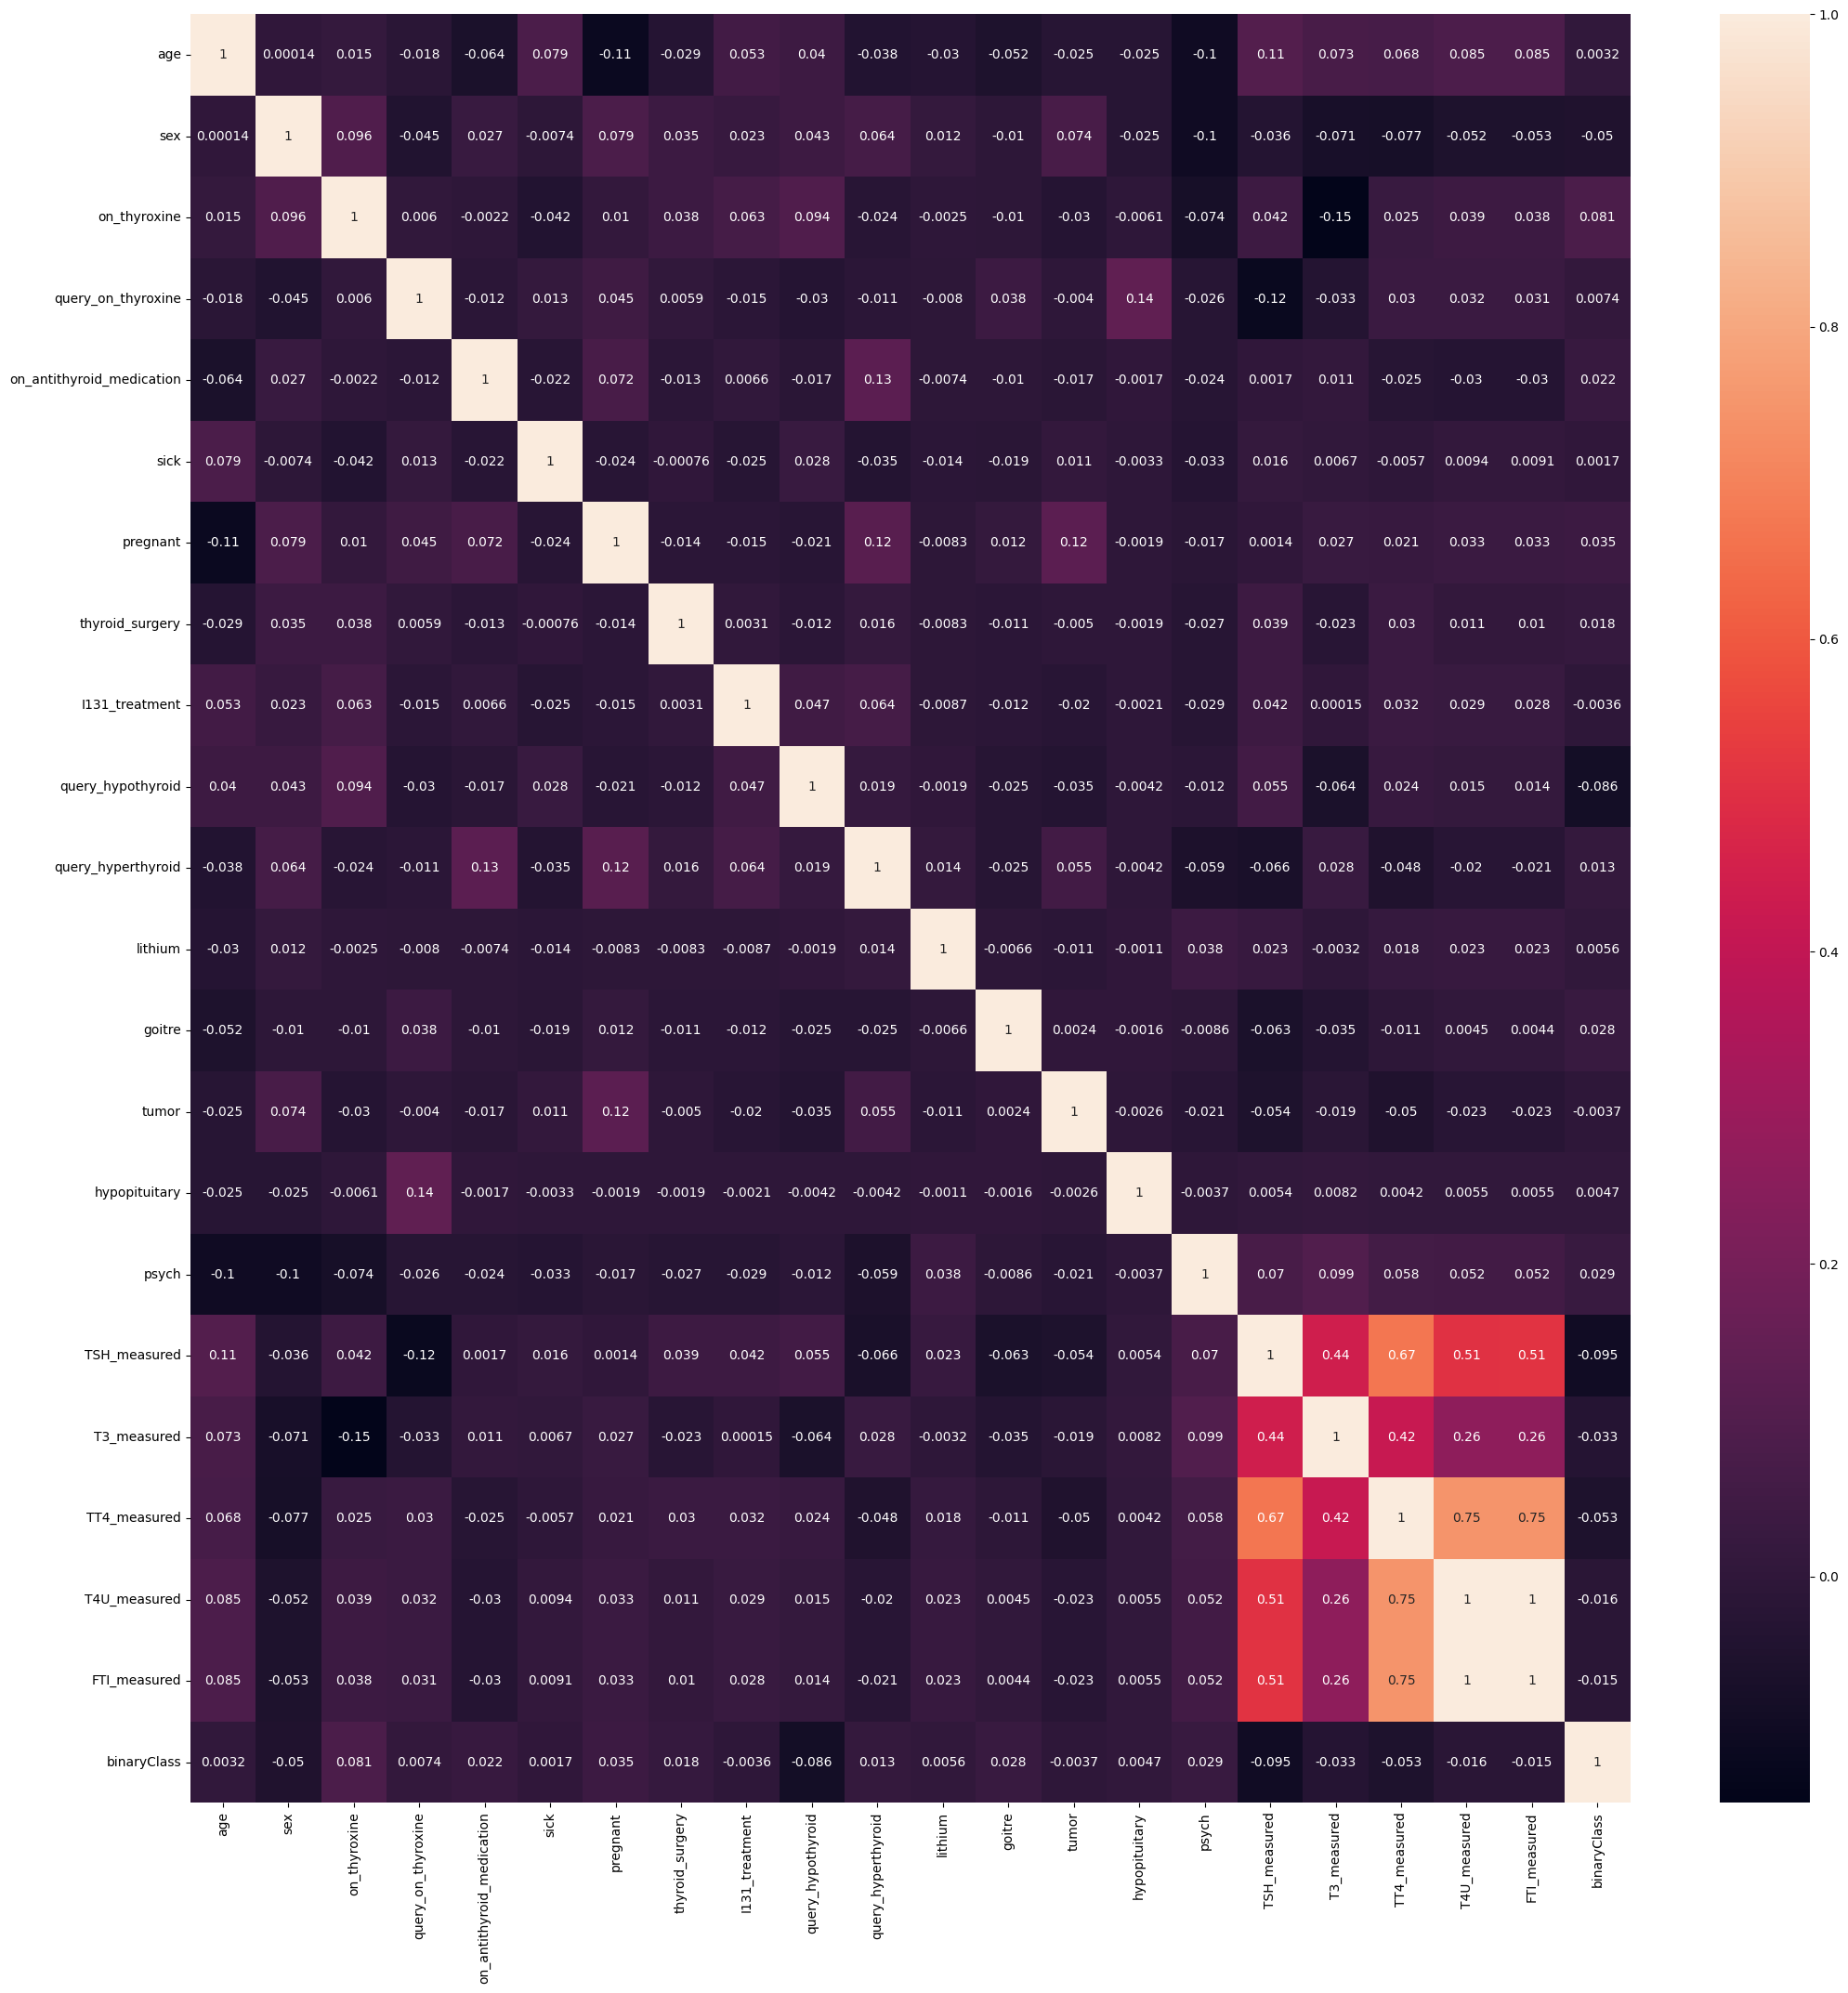

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
print("HEAT MAP")
plt.figure(figsize=(25,25))
sns.heatmap(a.corr(),annot=True)